In [5]:
from pygsm import GlobalSkyModel2016
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
def rotate_map(hmap, rot_theta, rot_phi):
    nside = hp.npix2nside(len(hmap))
    
    # Get theta, phi for non-rotated map
    t,p = hp.pix2ang(nside, np.arange(hp.nside2npix(nside))) #theta, phi

    # Define a rotator
    r = hp.Rotator(deg=False, rot=[rot_phi,rot_theta])
    
    # Get theta, phi under rotated co-ordinates
    trot, prot = r(t,p)
    
    # Inerpolate map onto these co-ordinates
    rot_map = hp.get_interp_val(hmap, trot,prot)
    
    return rot_map

In [33]:
gsm = GlobalSkyModel2016(unit="MJysr")

In [34]:
gsm.generate([150.])

array([ 0.02297591,  0.01816678,  0.01622117, ...,  0.03420904,
        0.03679563,  0.03377926], dtype=float32)

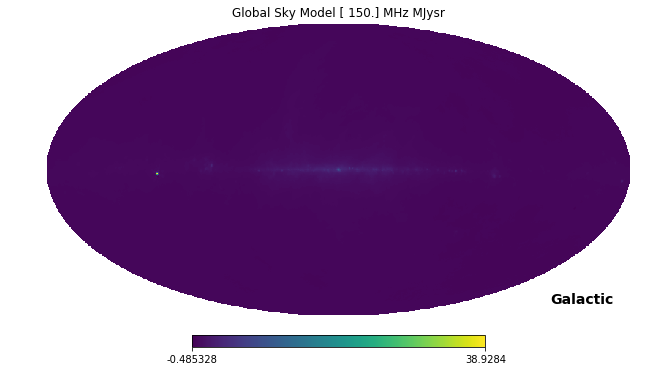

In [35]:
gsm.view()

We want to, in the end, spline this map onto a uniform $l,m$ grid.

In [36]:
theta0, phi0 = -np.pi/6, np.pi*2./3.
rot_map = rotate_map(gsm.generated_map_data, theta0, phi0)

In [37]:
lgrid = np.linspace(-1,1,100)
L,M = np.meshgrid(lgrid,lgrid)
lm = np.sqrt(L**2+M**2).flatten()
mask = lm < 1

In [38]:
theta = np.arcsin(lm[mask])
phimod = np.arccos(L.flatten()[mask] / lm[mask])
phi = np.where(M.flatten()[mask] < 0, phimod, -phimod)
phi[np.isnan(phi)] = 0.0

In [39]:
lm_map = np.zeros(100*100)*np.nan

In [40]:
# Generate map from interpolation
lm_map[mask] = hp.pixelfunc.get_interp_val(rot_map, theta, phi)
lm_map = lm_map.reshape((100,100))

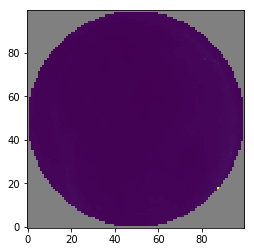

In [41]:
plt.imshow(lm_map.T, origin='lower')

In [44]:
print np.mean(lm_map[30:70,30:70])
print np.std(lm_map[30:70,30:70])


0.130234352167
0.0201519467437


In [32]:
GlobalSkyModel2016?

In [45]:
from powerbox import PowerBox

In [73]:
std = np.zeros(20)
for i in range(20):
    pb = PowerBox(N=100, pk = lambda u : (u/0.105)**-2.7, dim=2, boxlength=1.0, a=0, b=2*np.pi)
    sig = 0.13 * (pb.delta_x() + 1)
    std[i] = np.std(sig)
print np.mean(std)

0.0208562011058


/home/steven/miniconda3/envs/spore/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()


/home/steven/miniconda3/envs/spore/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':


In [59]:
np.std(sig)

0.053706795223044702